In [59]:
#Libraries for our model
import warnings
warnings.filterwarnings("ignore")                     #Library function to ignore useless warnings 
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [60]:
path = input("Enter the path to the CSV file: ")

# Load the CSV file into a pandas DataFrame
data = pd.read_csv(path)

position = data.columns.get_loc('NAME')

print("Area temperature we are using : ",data.iloc[1, position])
print("Number of rows in the Dataset : ",len(data))

Enter the path to the CSV file: /content/15-4-2023,Weather.csv
Area temperature we are using :  AL AIN INTERNATIONAL, AE
Number of rows in the Dataset :  10561


In [61]:
# Check for missing values
print("Number of missing values before filtering:", data.isnull().sum().sum())

#Data Cleaing
#Clearing data of empty values
# Filter the data for temperature measurements
data = data[['DATE', 'TMAX', 'TMIN', 'TAVG']]
data = data[data.notna().all(axis=1)]

# Check for missing values
print("Number of missing values after filtering:", data.isnull().sum().sum())

#Index is removed and data is reaaranged in order after null values are removed
data = data.groupby(['DATE']).mean().reset_index()


Number of missing values before filtering: 37488
Number of missing values after filtering: 0


In [62]:
# Convert the date column to a datetime object
data['DATE'] = pd.to_datetime(data['DATE'])

# Create new columns for year, month, and day
data['year'] = data['DATE'].dt.year
data['month'] = data['DATE'].dt.month
data['day'] = data['DATE'].dt.day

print(data)

           DATE   TMAX   TMIN   TAVG  year  month  day
0    1994-03-24  295.0  195.0  238.0  1994      3   24
1    1994-03-29  280.0  130.0  201.0  1994      3   29
2    1994-03-30  317.0  133.0  216.0  1994      3   30
3    1994-03-31  338.0  157.0  248.0  1994      3   31
4    1994-04-01  374.0  179.0  282.0  1994      4    1
...         ...    ...    ...    ...   ...    ...  ...
4601 2023-04-07  334.0  164.0  251.0  2023      4    7
4602 2023-04-09  343.0  191.0  269.0  2023      4    9
4603 2023-04-10  357.0  213.0  281.0  2023      4   10
4604 2023-04-11  365.0  218.0  299.0  2023      4   11
4605 2023-04-12  362.0  246.0  308.0  2023      4   12

[4606 rows x 7 columns]


In [63]:
#Data splitting in training and Testing 
X_train_TMAX, X_test_TMAX, y_train_TMAX, y_test_TMAX = train_test_split(data[['year', 'month', 'day']], data['TMAX'], test_size=0.2)



In [64]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()



Epoch 1/250
116/116 [==============================] - 0s 2ms/step - loss: 110022.5781
Epoch 2/250
116/116 [==============================] - 0s 1ms/step - loss: 8677.2598
Epoch 3/250
116/116 [==============================] - 0s 2ms/step - loss: 5873.2041
Epoch 4/250
116/116 [==============================] - 0s 2ms/step - loss: 5797.1572
Epoch 5/250
116/116 [==============================] - 0s 2ms/step - loss: 5795.4941
Epoch 6/250
116/116 [==============================] - 0s 2ms/step - loss: 5794.5820
Epoch 7/250
116/116 [==============================] - 0s 2ms/step - loss: 5793.7134
Epoch 8/250
116/116 [==============================] - 0s 2ms/step - loss: 5793.9253
Epoch 9/250
116/116 [==============================] - 0s 1ms/step - loss: 5793.7554
Epoch 10/250
116/116 [==============================] - 0s 2ms/step - loss: 5794.2388
Epoch 11/250
116/116 [==============================] - 0s 2ms/step - loss: 5793.6411
Epoch 12/250
116/116 [==============================] - 0s 2m

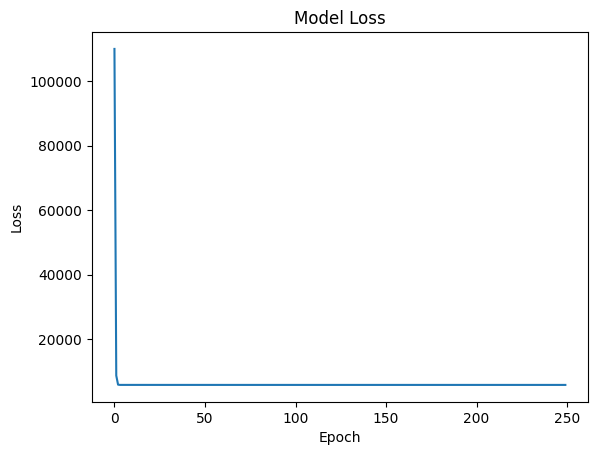

In [65]:

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    keras.layers.Dense(1)
])

# Compile the model with SGD optimizer and learning rate of 0.01
opt = SGD(learning_rate=0.000000001)
model.compile(optimizer=opt, loss='mse')

# Train the model
history = model.fit(X_train_TMAX, y_train_TMAX, epochs=250)

plot_loss(history)



In [66]:

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_TMAX, y_test_TMAX)
print('Test loss:', test_loss)


29/29 [==============================] - 0s 1ms/step - loss: 5585.3862
Test loss: 5585.38623046875


In [67]:

# Predict the maximum temperature for a given date
new_date = pd.to_datetime('2020-03-2')
new_year = new_date.year
new_month = new_date.month
new_day = new_date.day
new_data = pd.DataFrame({'year': [new_year], 'month': [new_month], 'day': [new_day]})
new_tmax = model.predict(new_data)
print('Predicted maximum temperature:', new_tmax[0][0])


1/1 [==============================] - 0s 62ms/step
Predicted maximum temperature: 364.921


In [68]:
# Evaluate the model accuracy on the test set
y_pred = model.predict(X_test_TMAX)

# Calculate the R2 score (accuracy) for TMAX predictions
accuracy = r2_score(y_test_TMAX, y_pred)

print("Model accuracy on test set:", accuracy)



29/29 [==============================] - 0s 1ms/step
Model accuracy on test set: -0.004454853827895455


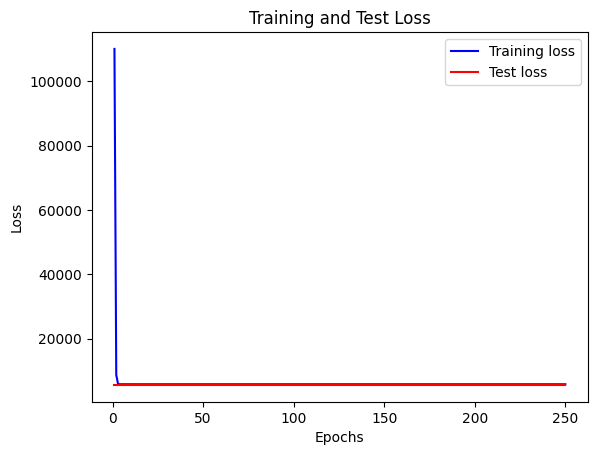

In [69]:
# Assuming 'Train_loss' is the training history of your machine learning model
train_loss = history.history['loss']
epochs = range(1, len(train_loss) + 1)

test_loss = []
for epoch in epochs:
    loss = model.evaluate(X_test_TMAX, y_test_TMAX, verbose=0)
    test_loss.append(loss)


# Plotting the test loss and training loss
plt.plot(epochs, train_loss, 'b-', label='Training loss')
plt.plot(epochs, test_loss, 'r-', label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()